<img src='https://img.freepik.com/free-vector/car-wheel-tire-isolated-white-hand-drawn-sketch-vector-illustration_460848-14812.jpg?t=st=1659977210~exp=1659977810~hmac=8c66bd003cda989139ec016d1fb18a99438e718d2fd2a9cd28b63ebd9df2d7c8'/>

In [46]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


import tensorflow_addons as tfa

In [47]:
path = 'auto-insurance.csv'
df = read_csv(path, header=None)
X, y = df.values[:, :-1], df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

In [48]:
df.head()

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


## Feature Engineering

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,63.0,22.904762,23.351946,0.0,7.50,14.0,29.0,124.0
1,63.0,98.187302,87.327553,0.0,38.85,73.4,140.0,422.2


In [50]:
def power_transformer(X):
    pt = PowerTransformer()
    pt.fit(X)
    return pt

In [51]:
# Transform the input
pt1 = power_transformer(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)

In [52]:
# Transform the ouput
pt2 = power_transformer(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

## Model

In [53]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# Define the optimizer
optimizer = tfa.optimizers.AdamW(learning_rate=0.01, weight_decay=0.01)



In [54]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [55]:
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(X_train, y_train, epochs=300, batch_size=4, callbacks=[callback], validation_data=(X_test,y_test))

Epoch 1/300
11/11 [==============================] - 0s 9ms/step - loss: 1.7435 - val_loss: 2.0494
Epoch 2/300
11/11 [==============================] - 0s 3ms/step - loss: 0.6405 - val_loss: 0.7949
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3596 - val_loss: 0.5573
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 0.3419 - val_loss: 0.5012
Epoch 5/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3457 - val_loss: 0.4895
Epoch 6/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3443 - val_loss: 0.4942
Epoch 7/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3417 - val_loss: 0.5092
Epoch 8/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3372 - val_loss: 0.5040
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3388 - val_loss: 0.5180
Epoch 10/300
11/11 [==============================] - 0s 3ms/step - loss: 0.3453 - val_loss: 0.5440
Epoch 11/

## Analyze

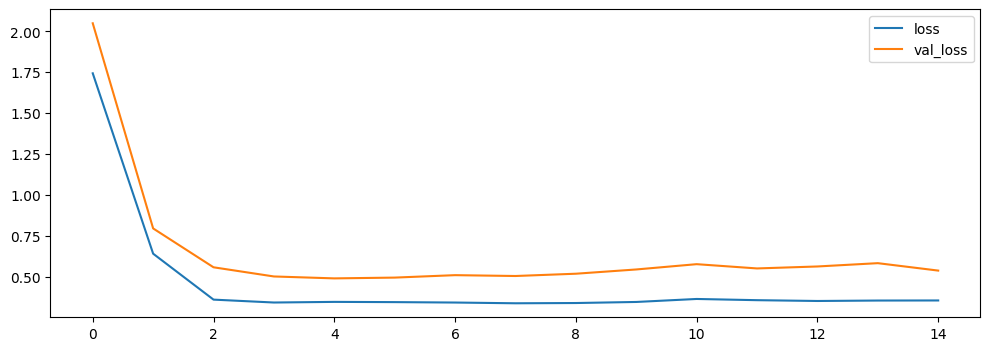

In [56]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

## Prediction

In [57]:
def predict(X, y_true):
    y_hat = model.predict(X)
    y_hat = pt2.inverse_transform(y_hat)
    y_true = pt2.inverse_transform(y_true)
    return y_hat, y_true

In [58]:
y_hat, y_test = predict(X_test, y_test)

1/1 [==============================] - 0s 45ms/step


In [59]:
score = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % score)

MAE: 39.065
